In [1]:
# Mount Google Drive to access project files
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Import all required package dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re
from nltk.stem import WordNetLemmatizer
import nltk
import os
# Download NLTK data for lemmatization
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

True

In [ ]:
# This function loads all .txt with the given document name and returns list
def load_documents(doc_type):
    # Initialize articles array and Google Drive directory path
    articles = []

    # Set Google Drive directory path (NEEDS TO BE CHANGED IF FILES IN DIFFERENT LOCATION)
    directory = '/content/drive/MyDrive/WRIT20833_Final_Project/project_data/'

    # Get all files in directory and store as variable
    all_files = os.listdir(directory)

    # Go through each file in line
    # If the file name contains 'doc_type' string at beginning and ends with '.txt', keep it
    doc_files = [f for f in all_files if f.lower().startswith(f'{doc_type}_doc_') and f.lower().endswith('.txt')]

    # Go through each file that matched the name filter above
    for filename in sorted(doc_files):
        filepath = os.path.join(directory, filename)
        try:
            # Open the file with 'r' read option
            with open(filepath, 'r', encoding='utf-8') as f:
                text = f.read().strip()
                if text:
                    # Get word count for displaying current processing output status
                    word_count = len(text.split())
                    # Store text for document in string in articles list
                    articles.append(text)
                    # Output current file loaded and number of words
                    print(f"Loaded {filename}: {word_count} words")
        except Exception as e:
            # Display error if exception is thrown
            # Show which file caused the loading error and the reason
            print(f"Error loading {filename}: {e}")

    # Display final success message after all files are loaded and stored properly
    print(f"\nSuccessfully loaded {len(articles)} {doc_type} documents.\n")
    return articles

In [ ]:
# Call load_documents function above for each dataset

# Load and store all documents in the soviet dataset
soviet_documents = load_documents('soviet')

# Load and store all documents in the western dataset
western_documents = load_documents('western')

  ✓ Loaded soviet_doc_1.txt: 6839 words
  ✓ Loaded soviet_doc_10.txt: 349 words
  ✓ Loaded soviet_doc_11.txt: 601 words
  ✓ Loaded soviet_doc_12.txt: 1095 words
  ✓ Loaded soviet_doc_13.txt: 1086 words
  ✓ Loaded soviet_doc_14.txt: 3481 words
  ✓ Loaded soviet_doc_15.txt: 455 words
  ✓ Loaded soviet_doc_16.txt: 1314 words
  ✓ Loaded soviet_doc_2.txt: 3053 words
  ✓ Loaded soviet_doc_3.txt: 93873 words
  ✓ Loaded soviet_doc_4.txt: 691 words
  ✓ Loaded soviet_doc_5.txt: 474 words
  ✓ Loaded soviet_doc_6.txt: 1035 words
  ✓ Loaded soviet_doc_7.txt: 179 words
  ✓ Loaded soviet_doc_8.txt: 179 words
  ✓ Loaded soviet_doc_9.txt: 1231 words

Successfully loaded 16 soviet documents.

  ✓ Loaded western_doc_1.txt: 51033 words
  ✓ Loaded western_doc_10.txt: 1104 words
  ✓ Loaded western_doc_11.txt: 270 words
  ✓ Loaded western_doc_12.txt: 2308 words
  ✓ Loaded western_doc_13.txt: 3588 words
  ✓ Loaded western_doc_14.txt: 320 words
  ✓ Loaded western_doc_15.txt: 493 words
  ✓ Loaded western_doc_2.

In [ ]:
# Generic stopwords list from HW3
stopwords = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers",
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is",
    "are", "was", "were", "be", "been", "being", "have", "has", "had", "having",
    "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or",
    "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
    "against", "between", "into", "through", "during", "before", "after", "above",
    "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under",
    "again", "further", "then", "once", "here", "there", "when", "where", "why",
    "how", "all", "both", "each", "few", "more", "most", "other", "some", "such",
    "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very",
    "s", "t", "can", "will", "just", "don", "should", "now", "ve", "ll", "amp",
    "also", "would", "could", "get", "go", "one", "two", "see", "time", "way",
    "may", "said", "say", "new", "first", "last", "long", "little", "much",
    "well", "still", "even", "back", "good", "many", "make", "made", "us", "really"
]

# Custom stop words on top of default list given in initial topic analysis assignment

'''These stop words are to filter our analysis to achieve a deeper level of insight instead of
simply the words describing the event. '''

chernobyl_stopwords = ["show", "movie", "review", "screen", "tv", "series",
                    "miniseries", "hbo", "chernobyl", "nuclear",
                      "reactor", "power", "water", "channel", "steam",
                       "page", "fuel", "level", "radiation", "np", "cde",
                       "june"]

# Add custom Chernobyl-specific stopwords to the main stopwords list
stopwords.extend(chernobyl_stopwords)

In [ ]:
# Initialize lemmatizer to reduce words to their base form
lemmatizer = WordNetLemmatizer()

# This step normalizes the text and then processes in natural language
def preprocess_for_topics(text):

    # Make sure text is available to avoid processing errors
    if pd.isna(text):
        return []

    # Convert to lowercase so that words appear the same without capitalization issues
    text = str(text).lower()

    # Remove punctuation and split into individual words
    words = re.findall(r'\b[a-z]+\b', text)

    # Remove stopwords and words less than three characters to get meaningful words
    words = [word for word in words if word not in stopwords and len(word) >= 3]

    # Lemmatize words to reduce to base form and standardize
    words = [lemmatizer.lemmatize(word) for word in words]

    # Return all processed words
    return words

In [ ]:
# Initialize empty array to store lists of list of soviet words from each doc after preprocessing
processed_soviet_documents = []

# Initialize empty array to store lists of list of western words from each doc after preprocessing
processed_western_documents = []

# Process each soviet document to extract individual and meaningful words and store
for doc in soviet_documents:
  processed_soviet_documents.append(preprocess_for_topics(doc))

# Process each western document to extract individual and meaningful words and store
for doc in western_documents:
  processed_western_documents.append(preprocess_for_topics(doc))

# Output example of text before and after preprocessing to show it works properly
print("Text Preprocessing Test:")
print(f"Original: {soviet_documents[0][:150]}...")
print(f"\nProcessed words: {processed_soviet_documents[0][:150]}")
print(f"\nLowercase, no punctuation, lemmatized, stopwords removed")

Text Preprocessing Test:
Original: 1. Report of the Government Commission for Investigation of Causes of the Accident at the Chernobyl NPS [Nuclear Power Station] on 26 April 1986. Gorb...

Processed words: ['report', 'government', 'commission', 'investigation', 'cause', 'accident', 'np', 'station', 'april', 'gorbachev', 'agreed', 'earlier', 'upon', 'completion', 'work', 'government', 'commission', 'investigation', 'cause', 'accident', 'chernoby', 'np', 'address', 'issue', 'politburo', 'session', 'commission', 'delivered', 'report', 'result', 'investigation', 'shcherbina', 'floor', 'shcherbina', 'deputy', 'chairman', 'ussr', 'council', 'minister', 'commission', 'delivered', 'report', 'accident', 'np', 'conclusion', 'recommendation', 'adopted', 'commission', 'unanimously', 'report', 'appendix', 'lay', 'cause', 'accident', 'conclusion', 'recommendation', 'stemming', 'analysis', 'situation', 'commission', 'analyzed', 'practically', 'source', 'primary', 'information', 'conclusion', 'instit

In [ ]:
# Combine all meaningful words from soviet dataset into single list for frequency analysis
soviet_meaningful_words = []
for doc in processed_soviet_documents:
    soviet_meaningful_words.extend(doc)

# Count word frequencies using Counter to get most common words
soviet_word_frequency = Counter(soviet_meaningful_words)

# Extract the top 20 most frequently occurring words
soviet_top_words = soviet_word_frequency.most_common(20)

# Display header for term frequency analysis results
print("TERM FREQUENCY ANALYSIS RESULTS")
print("=" * 40)
# Show total number of words analyzed after preprocessing
print(f"Total words analyzed: {len(soviet_meaningful_words):,}")
# Show number of unique words found in the dataset
print(f"Unique words found: {len(soviet_word_frequency):,}")
print(f"\nTop 20 most frequent words:")

# Output each of the top 20 words with their frequency count
for i, (word, count) in enumerate(soviet_top_words, 1):
    print(f"{i:2d}. {word:<15} ({count:,} times)")

🔤 TERM FREQUENCY ANALYSIS RESULTS
Total words analyzed: 53,949
Unique words found: 9,238

Top 20 most frequent words:
 1. system          (489 times)
 2. accident        (339 times)
 3. unit            (275 times)
 4. control         (270 times)
 5. energy          (223 times)
 6. safety          (222 times)
 7. zone            (220 times)
 8. channel         (216 times)
 9. pressure        (213 times)
10. station         (184 times)
11. signal          (184 times)
12. plant           (180 times)
13. heat            (179 times)
14. radioactive     (172 times)
15. detector        (172 times)
16. condition       (167 times)
17. emergency       (166 times)
18. rod             (159 times)
19. release         (155 times)
20. operation       (152 times)


In [ ]:
# Combine all meaningful words from western dataset into single list for frequency analysis
western_meaningful_words = []
for doc in processed_western_documents:
    western_meaningful_words.extend(doc)

# Count word frequencies using Counter to get most common words
western_word_frequency = Counter(western_meaningful_words)

# Extract the top 20 most frequently occurring words
western_top_words = western_word_frequency.most_common(20)

# Display header for term frequency analysis results
print("🔤 TERM FREQUENCY ANALYSIS RESULTS")
print("=" * 40)
# Show total number of words analyzed after preprocessing
print(f"Total words analyzed: {len(western_meaningful_words):,}")
# Show number of unique words found in the dataset
print(f"Unique words found: {len(western_word_frequency):,}")
print(f"\nTop 20 most frequent words:")

# Output each of the top 20 words with their frequency count
for i, (word, count) in enumerate(western_top_words, 1):
    print(f"{i:2d}. {word:<15} ({count:,} times)")

🔤 TERM FREQUENCY ANALYSIS RESULTS
Total words analyzed: 31,338
Unique words found: 5,036

Top 20 most frequent words:
 1. accident        (461 times)
 2. safety          (314 times)
 3. system          (314 times)
 4. design          (311 times)
 5. plant           (282 times)
 6. rod             (279 times)
 7. control         (237 times)
 8. reactivity      (232 times)
 9. soviet          (225 times)
10. core            (219 times)
11. operating       (214 times)
12. rbmk            (209 times)
13. protection      (165 times)
14. unit            (149 times)
15. emergency       (137 times)
16. state           (132 times)
17. institute       (123 times)
18. operation       (122 times)
19. personnel       (114 times)
20. commission      (111 times)


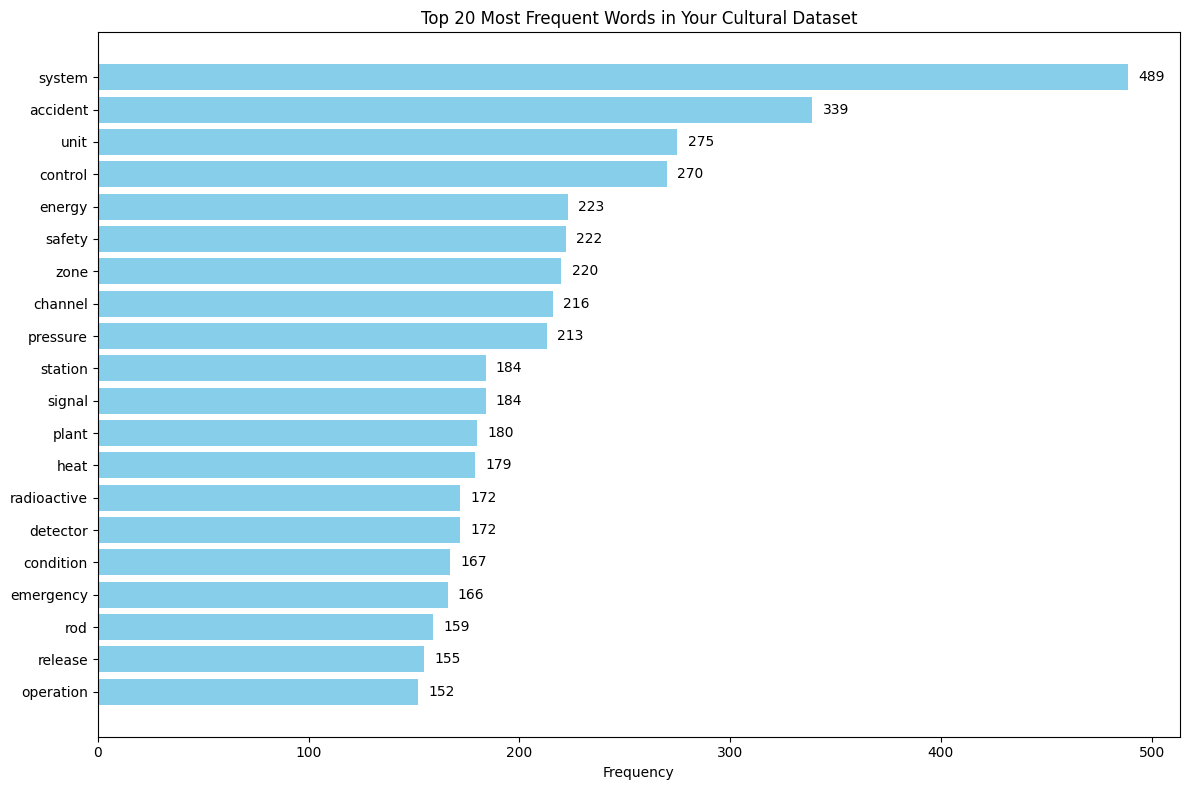

📊 Term frequency visualization complete!


In [ ]:
# Extract just the words from the top words list for visualization
words = [word for word, count in soviet_top_words]

# Extract just the counts from the top words list for visualization
counts = [count for word, count in soviet_top_words]

# Create horizontal bar chart to visualize word frequencies
plt.figure(figsize=(12, 8))
plt.barh(range(len(words)), counts, color='skyblue')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.title(f'Top {len(words)} Most Frequent Words in Your Cultural Dataset')
# Invert y-axis so highest frequency word appears at top
plt.gca().invert_yaxis()

# Add count labels on bars to show exact frequency values
for i, count in enumerate(counts):
    plt.text(count + max(counts)*0.01, i, str(count), va='center')

# Display the visualization
plt.tight_layout()
plt.show()

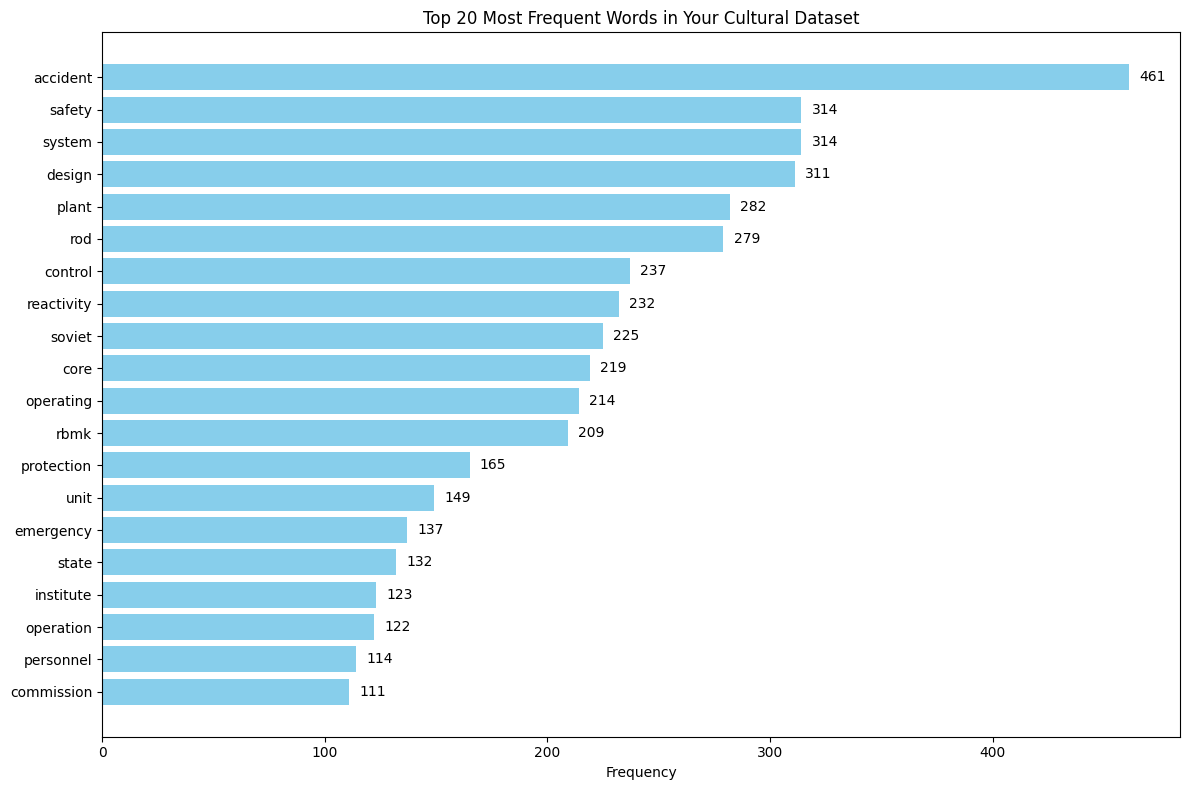

📊 Term frequency visualization complete!


In [ ]:
# Extract just the words from the top words list for visualization
words = [word for word, count in western_top_words]

# Extract just the counts from the top words list for visualization
counts = [count for word, count in western_top_words]

# Create horizontal bar chart to visualize word frequencies
plt.figure(figsize=(12, 8))
plt.barh(range(len(words)), counts, color='skyblue')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.title(f'Top {len(words)} Most Frequent Words in Your Cultural Dataset')
# Invert y-axis so highest frequency word appears at top
plt.gca().invert_yaxis()

# Add count labels on bars to show exact frequency values
for i, count in enumerate(counts):
    plt.text(count + max(counts)*0.01, i, str(count), va='center')

# Display the visualization
plt.tight_layout()
plt.show()

In [ ]:
# Install VADER sentiment analysis package
!pip install vaderSentiment

# Import VADER sentiment analyzer for polarity scoring
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

print("VADER installed and ready for sentiment analysis!")

✅ VADER installed and ready for sentiment analysis!


In [ ]:
# This function calculates sentiment score for any text input
def get_sentiment_score(text, index=None, source=None, max_chunk=2000):
    # Compute sentiment safely for long or unformatted text
    try:
        # Convert text to string if it's not already to avoid type errors
        if not isinstance(text, str):
            text = str(text)
        # Remove leading and trailing whitespace
        text = text.strip()
        # Return neutral score if text is empty
        if not text:
            return 0.0

        # Ran into issues of failing with large amounts of text
        # ChatGPT recommended to break into chunks before processing like this

        # Break into manageable chunks (~2000 chars each)
        chunks = re.findall(r'.{1,%d}' % max_chunk, text)
        # Initialize list to store sentiment scores for each chunk
        scores = []
        # Process each chunk separately
        for c in chunks:
            # Get compound sentiment score (ranges from -1 to 1) for this chunk
            s = analyzer.polarity_scores(c)['compound']
            scores.append(s)

        # Calculate average sentiment across all chunks
        avg_score = sum(scores) / len(scores) if scores else 0.0
        return avg_score

    except Exception as e:
        # Display error message if sentiment analysis fails for this document
        print(f"Error processing [{source} {index}]: {e}")
        # Return neutral score on error
        return 0.0

# Initialize empty lists to store sentiment analysis results
soviet_sentiment = []
western_sentiment = []

print("Applying sentiment analysis to Soviet documents...")
# Process each soviet document and calculate its sentiment score
for i, doc in enumerate(soviet_documents, start=1):
    score = get_sentiment_score(doc)
    soviet_sentiment.append({"text": doc, "sentiment_score": score})
    print(f"[Soviet {i}/{len(soviet_documents)}] Score: {score:.3f}")

print("\nApplying sentiment analysis to Western documents...")
# Process each western document and calculate its sentiment score
for i, doc in enumerate(western_documents, start=1):
    score = get_sentiment_score(doc)
    western_sentiment.append({"text": doc, "sentiment_score": score})
    print(f"[Western {i}/{len(western_documents)}] Score: {score:.3f}")

# Convert sentiment results lists into pandas DataFrames for easier analysis
soviet_df = pd.DataFrame(soviet_sentiment)
western_df = pd.DataFrame(western_sentiment)

🕵️ Applying sentiment analysis to Soviet documents...
[Soviet 1/16] Score: -0.023
[Soviet 2/16] Score: -0.175
[Soviet 3/16] Score: -0.810
[Soviet 4/16] Score: -0.836
[Soviet 5/16] Score: -0.836
[Soviet 6/16] Score: -0.225
[Soviet 7/16] Score: -0.104
[Soviet 8/16] Score: -0.384
[Soviet 9/16] Score: 0.007
[Soviet 10/16] Score: -0.002
[Soviet 11/16] Score: 0.390
[Soviet 12/16] Score: 0.657
[Soviet 13/16] Score: 0.157
[Soviet 14/16] Score: -0.917
[Soviet 15/16] Score: -0.802
[Soviet 16/16] Score: 0.066

🕵️ Applying sentiment analysis to Western documents...
[Western 1/15] Score: -0.018
[Western 2/15] Score: 0.421
[Western 3/15] Score: 0.545
[Western 4/15] Score: -0.448
[Western 5/15] Score: 0.016
[Western 6/15] Score: 0.099
[Western 7/15] Score: -0.173
[Western 8/15] Score: -0.220
[Western 9/15] Score: -0.204
[Western 10/15] Score: -0.272
[Western 11/15] Score: -0.013
[Western 12/15] Score: -0.141
[Western 13/15] Score: 0.172
[Western 14/15] Score: 0.276
[Western 15/15] Score: 0.129


In [ ]:
# Count number of soviet documents with positive sentiment (score > 0.1)
soviet_positive = len(soviet_df[soviet_df['sentiment_score'] > 0.1])
# Count number of soviet documents with neutral sentiment (score between -0.1 and 0.1)
soviet_neutral = len(soviet_df[(soviet_df['sentiment_score'] >= -0.1) & (soviet_df['sentiment_score'] <= 0.1)])
# Count number of soviet documents with negative sentiment (score < -0.1)
soviet_negative = len(soviet_df[soviet_df['sentiment_score'] < -0.1])

print("SOVIET SENTIMENT ANALYSIS")
print("=" * 40)
print(f"\nSentiment score range: {soviet_df['sentiment_score'].min():.3f} to {soviet_df['sentiment_score'].max():.3f}")
print(f"Average sentiment: {soviet_df['sentiment_score'].mean():.3f}")
print(f"\nSentiment distribution:")
print(f"Positive (>0.1): {soviet_positive} ({soviet_positive/len(soviet_df)*100:.1f}%)")
print(f"Neutral (-0.1 to 0.1): {soviet_neutral} ({soviet_neutral/len(soviet_df)*100:.1f}%)")
print(f"Negative (<-0.1): {soviet_negative} ({soviet_negative/len(soviet_df)*100:.1f}%)")
print(soviet_df)

# Count number of western documents with positive sentiment (score > 0.1)
western_positive = len(western_df[western_df['sentiment_score'] > 0.1])
# Count number of western documents with neutral sentiment (score between -0.1 and 0.1)
western_neutral = len(western_df[(western_df['sentiment_score'] >= -0.1) & (western_df['sentiment_score'] <= 0.1)])
# Count number of western documents with negative sentiment (score < -0.1)
western_negative = len(western_df[western_df['sentiment_score'] < -0.1])

print("\n\n\n")
print("WESTERN SENTIMENT ANALYSIS")
print("=" * 40)
print(f"\nSentiment score range: {western_df['sentiment_score'].min():.3f} to {western_df['sentiment_score'].max():.3f}")
print(f"Average sentiment: {western_df['sentiment_score'].mean():.3f}")
print(f"\nSentiment distribution:")
print(f"Positive (>0.1): {western_positive} ({western_positive/len(western_df)*100:.1f}%)")
print(f"Neutral (-0.1 to 0.1): {western_neutral} ({western_neutral/len(western_df)*100:.1f}%)")
print(f"Negative (<-0.1): {western_negative} ({western_negative/len(western_df)*100:.1f}%)")
print(western_df)

SOVIET SENTIMENT ANALYSIS

Sentiment score range: -0.917 to 0.657
Average sentiment: -0.240

Sentiment distribution:
Positive (>0.1): 3 (18.8%)
Neutral (-0.1 to 0.1): 4 (25.0%)
Negative (<-0.1): 9 (56.2%)
                                                 text  sentiment_score
0   1. Report of the Government Commission for Inv...        -0.022524
1   April 29, 1986  Politburo Session Notes[from t...        -0.174600
2   ReferenceAbout the situation among internation...        -0.810067
3   CC CPSU Politburo Session, July 3, 1986   Work...        -0.836360
4   Shcherbina B.E.  Let me report the main [findi...        -0.836360
5   1986 July 03Chernyaev’s Notes from the Politbu...        -0.224744
6   CC CPSU Politburo Session, June 5, 1986 Anatol...        -0.104200
7   CC CPSUFrom May 4 to 9, I was in the area of t...        -0.384400
8   # Mikhail Gorbachev's Address to the Soviet Na...         0.007100
9   M~aterials obtained fram the following organiz...        -0.001685
10  Secretary 

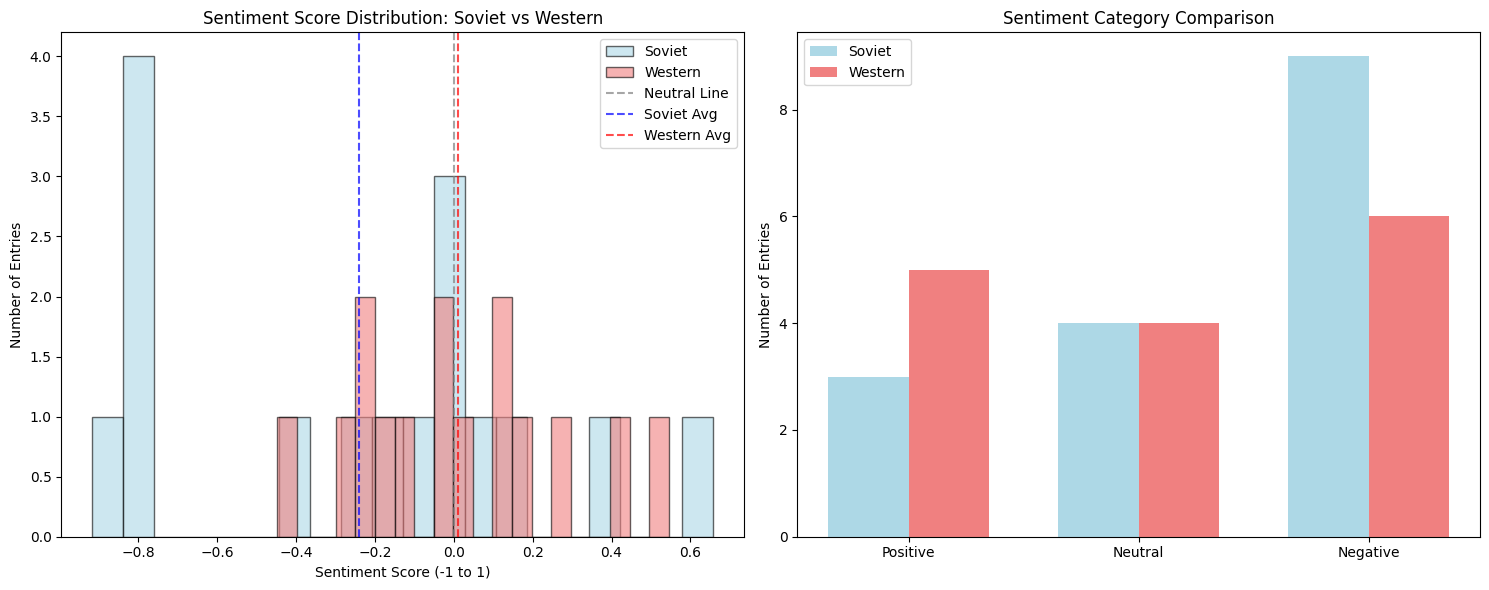

📊 Comparative sentiment visualizations complete!


In [ ]:
# Set up figure with 1 row and 2 columns for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Sentiment score distribution (side-by-side histograms)
bins = 20
axes[0].hist(soviet_df['sentiment_score'], bins=bins, alpha=0.6, color='lightblue', label='Soviet', edgecolor='black')
axes[0].hist(western_df['sentiment_score'], bins=bins, alpha=0.6, color='lightcoral', label='Western', edgecolor='black')
axes[0].axvline(0, color='gray', linestyle='--', alpha=0.7, label='Neutral Line')
axes[0].axvline(soviet_df['sentiment_score'].mean(), color='blue', linestyle='--', alpha=0.7, label='Soviet Avg')
axes[0].axvline(western_df['sentiment_score'].mean(), color='red', linestyle='--', alpha=0.7, label='Western Avg')

axes[0].set_title('Sentiment Score Distribution: Soviet vs Western')
axes[0].set_xlabel('Sentiment Score (-1 to 1)')
axes[0].set_ylabel('Number of Entries')
axes[0].legend()

# Sentiment category comparison (grouped bar chart)
categories = ['Positive', 'Neutral', 'Negative']
soviet_counts = [soviet_positive, soviet_neutral, soviet_negative]
western_counts = [western_positive, western_neutral, western_negative]

x = range(len(categories))
bar_width = 0.35

axes[1].bar([i - bar_width/2 for i in x], soviet_counts, width=bar_width, color='lightblue', label='Soviet')
axes[1].bar([i + bar_width/2 for i in x], western_counts, width=bar_width, color='lightcoral', label='Western')

axes[1].set_xticks(x)
axes[1].set_xticklabels(categories)
axes[1].set_title('Sentiment Category Comparison')
axes[1].set_ylabel('Number of Entries')
axes[1].legend()

# Display chart
plt.tight_layout()
plt.show()


In [ ]:
# This function extracts top words from documents based on sentiment category
def get_top_words(df, word_lists, sentiment='positive', top_n=10):
    # Filter for positive documents (score > 0.1)
    if sentiment == 'positive':
        indices = df.index[df['sentiment_score'] > 0.1].tolist()
    # Filter for negative documents (score < -0.1)
    elif sentiment == 'negative':
        indices = df.index[df['sentiment_score'] < -0.1].tolist()
    # Show error if invalid sentiment parameter provided
    else:
        raise ValueError("Sentiment must be 'positive' or 'negative'")

    # Initialize list to collect all words from selected documents
    words = []
    # Loop through each document index that matches the sentiment filter
    for i in indices:
        # Add all words from this document to the combined list
        words.extend(word_lists[i])

    # Count frequency of each word across all selected documents
    freq = Counter(words)
    # Return both the document indices and the word frequency counter
    return indices, freq

# Create dictionary to organize both datasets with their corresponding word lists
datasets = {
    'Soviet': (soviet_df, processed_soviet_documents),
    'Western': (western_df, processed_western_documents)
}

print("COMPARING WORDS IN POSITIVE vs. NEGATIVE ENTRIES")
print("=" * 70)

# Loop through each dataset and show sentiment categories
for name, (df, word_lists) in datasets.items():
    for sentiment in ['positive', 'negative']:
        indices, freq = get_top_words(df, word_lists, sentiment)
        print(f"\n{name} - Top 10 words in {sentiment.upper()} entries ({len(indices)} entries):")
        for word, count in freq.most_common(10):
            print(f"  {word:<15} ({count} times)")



🔍 COMPARING WORDS IN POSITIVE vs. NEGATIVE ENTRIES

Soviet - Top 10 words in POSITIVE entries (3 entries):
  thousand        (21 times)
  meter           (19 times)
  work            (16 times)
  square          (16 times)
  area            (12 times)
  per             (10 times)
  hour            (9 times)
  issue           (9 times)
  np              (8 times)
  level           (8 times)

Soviet - Top 10 words in NEGATIVE entries (9 entries):
  np              (49 times)
  accident        (46 times)
  station         (39 times)
  energy          (37 times)
  ministry        (31 times)
  people          (28 times)
  year            (26 times)
  system          (25 times)
  building        (23 times)
  state           (20 times)

Western - Top 10 words in POSITIVE entries (5 entries):
  soviet          (79 times)
  gorbachev       (36 times)
  state           (16 times)
  summit          (15 times)
  reduction       (15 times)
  united          (15 times)
  defense         (14 times)
 

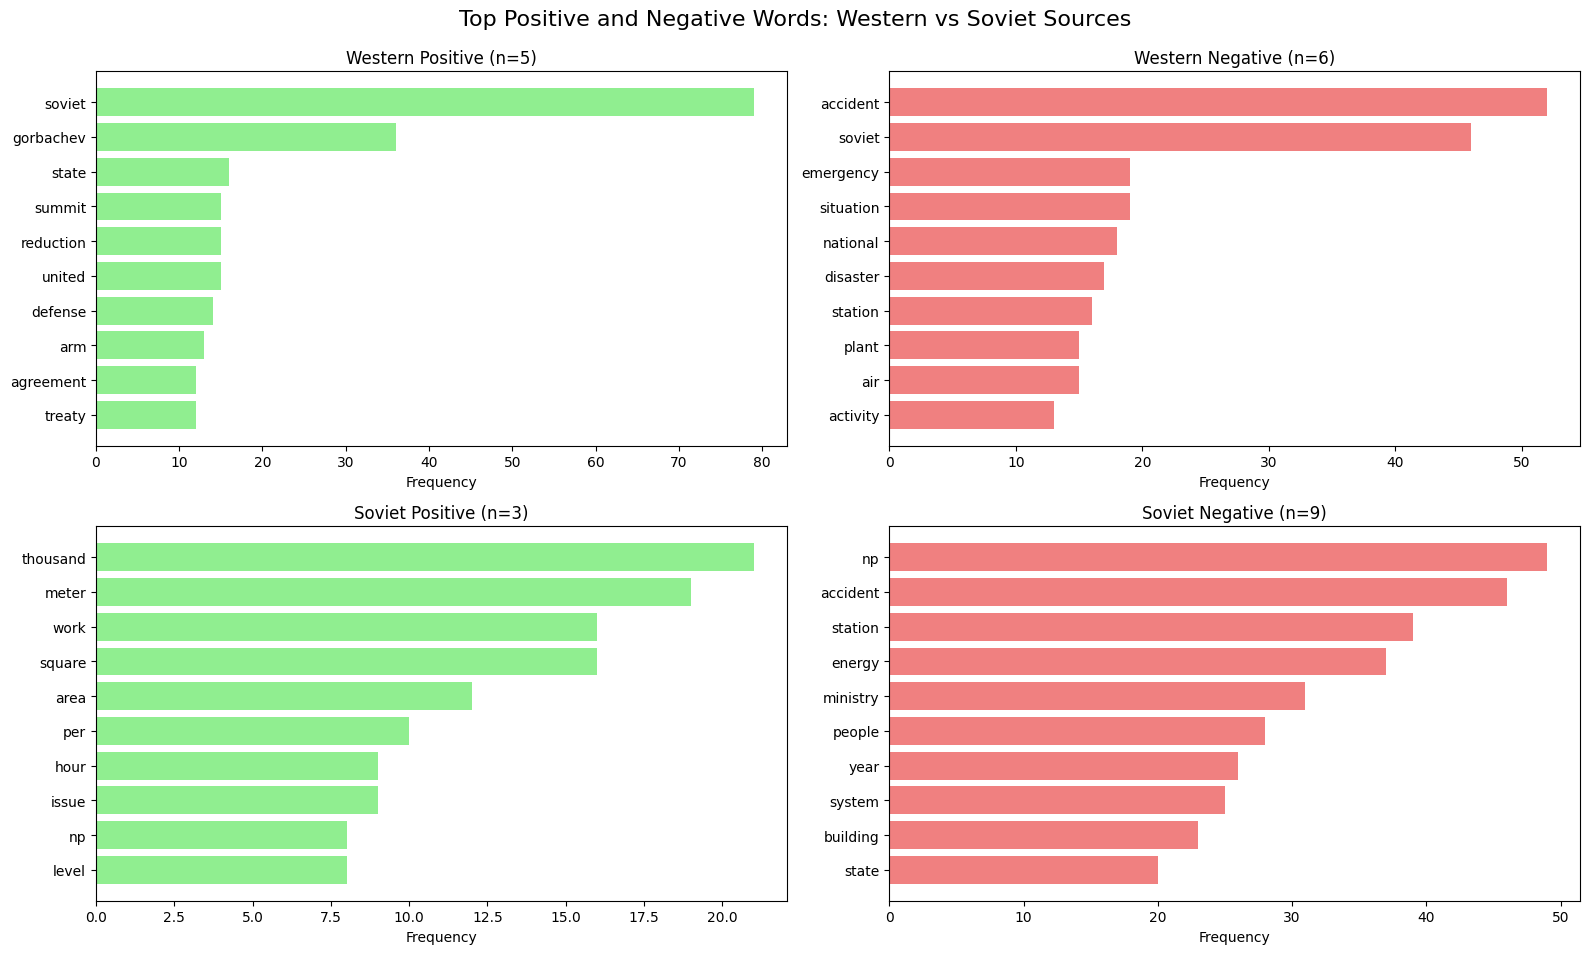

In [ ]:
# First, compute top word counters for each dataset and sentiment
# Initialize dictionary to store all word frequency results
top_word_counters = {}

# Loop through each dataset to calculate word frequencies
for name, (df, word_lists) in datasets.items():
    # Create nested dictionary for this dataset
    top_word_counters[name] = {}
    for sentiment in ['positive', 'negative']:
        indices, freq = get_top_words(df, word_lists, sentiment)
        top_word_counters[name][sentiment] = (indices, freq)

# Extract soviet and western top words for positive and negative sentiments
soviet_positive_entries, soviet_positive_freq = top_word_counters['Soviet']['positive']
soviet_negative_entries, soviet_negative_freq = top_word_counters['Soviet']['negative']
western_positive_entries, western_positive_freq = top_word_counters['Western']['positive']
western_negative_entries, western_negative_freq = top_word_counters['Western']['negative']

# Create 2x2 grid of subplots for comprehensive comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Top Positive and Negative Words: Western vs Soviet Sources", fontsize=16, y=0.95)

# WESTERN POSITIVE - Extract top 10 words and their counts
pos_words = [word for word, count in western_positive_freq.most_common(10)]
pos_counts = [count for word, count in western_positive_freq.most_common(10)]
axes[0, 0].barh(range(len(pos_words)), pos_counts, color='lightgreen')
axes[0, 0].set_yticks(range(len(pos_words)))
axes[0, 0].set_yticklabels(pos_words)
axes[0, 0].set_title(f'Western Positive (n={len(western_positive_entries)})')
axes[0, 0].invert_yaxis()
axes[0, 0].set_xlabel('Frequency')

# WESTERN NEGATIVE - Extract top 10 words and their counts
neg_words = [word for word, count in western_negative_freq.most_common(10)]
neg_counts = [count for word, count in western_negative_freq.most_common(10)]
axes[0, 1].barh(range(len(neg_words)), neg_counts, color='lightcoral')
axes[0, 1].set_yticks(range(len(neg_words)))
axes[0, 1].set_yticklabels(neg_words)
axes[0, 1].set_title(f'Western Negative (n={len(western_negative_entries)})')
axes[0, 1].invert_yaxis()
axes[0, 1].set_xlabel('Frequency')

# SOVIET POSITIVE - Extract top 10 words and their counts
pos_words = [word for word, count in soviet_positive_freq.most_common(10)]
pos_counts = [count for word, count in soviet_positive_freq.most_common(10)]
axes[1, 0].barh(range(len(pos_words)), pos_counts, color='lightgreen')
axes[1, 0].set_yticks(range(len(pos_words)))
axes[1, 0].set_yticklabels(pos_words)
axes[1, 0].set_title(f'Soviet Positive (n={len(soviet_positive_entries)})')
axes[1, 0].invert_yaxis()
axes[1, 0].set_xlabel('Frequency')

# SOVIET NEGATIVE - Extract top 10 words and their counts
neg_words = [word for word, count in soviet_negative_freq.most_common(10)]
neg_counts = [count for word, count in soviet_negative_freq.most_common(10)]
axes[1, 1].barh(range(len(neg_words)), neg_counts, color='lightcoral')
axes[1, 1].set_yticks(range(len(neg_words)))
axes[1, 1].set_yticklabels(neg_words)
axes[1, 1].set_title(f'Soviet Negative (n={len(soviet_negative_entries)})')
axes[1, 1].invert_yaxis()
axes[1, 1].set_xlabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# Save sentiment analysis results to Google Drive for later use in Topic Analysis

# Save soviet sentiment results to CSV file
soviet_df.to_csv('/content/drive/MyDrive/WRIT20833_Final_Project/processed_data/soviet_sentiment.csv', index=False)

# Save western sentiment results to CSV file
western_df.to_csv('/content/drive/MyDrive/WRIT20833_Final_Project/processed_data/western_sentiment.csv', index=False)

print("DataFrames saved to Google Drive as CSV files!")

✅ DataFrames saved to Google Drive as CSV files!
